In [1]:
import gym
import numpy as np
import random
import gym_gridworlds
import matplotlib.pyplot as plt

## Wanted to start off Q-Learning with initializing Paul in a 4x4 grid and making it work. 

In [2]:
environment = gym.make("FrozenLake-v1", desc = ["SFFF", "FFFF", "FHFF", "FFFG"], is_slippery=False)
environment.reset()
environment.render()

/Users/aleenashabbir/opt/anaconda3/lib/python3.8/site-packages/gym/envs/toy_text/frozen_lake.py:271: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("FrozenLake-v1", render_mode="rgb_array")
  logger.warn(


In [3]:
qtable = np.zeros((16, 4))

nb_states = environment.observation_space.n  # = 16
nb_actions = environment.action_space.n      # = 4
qtable = np.zeros((nb_states, nb_actions))

print('Q-table =')
print(qtable)

Q-table =
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [4]:
action = environment.action_space.sample()

# 2. Implement this action and move the agent in the desired direction
new_state, reward, done, info, _ = environment.step(action)

# Display the results (reward and map)
environment.render()
print(f'Reward = {reward}')

Reward = 0.0


Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-table after training:
[[0.      0.      0.59049 0.     ]
 [0.      0.6561  0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.729   0.     ]
 [0.      0.      0.81    0.     ]
 [0.      0.9     0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.3375  0.     ]
 [0.      1.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]]


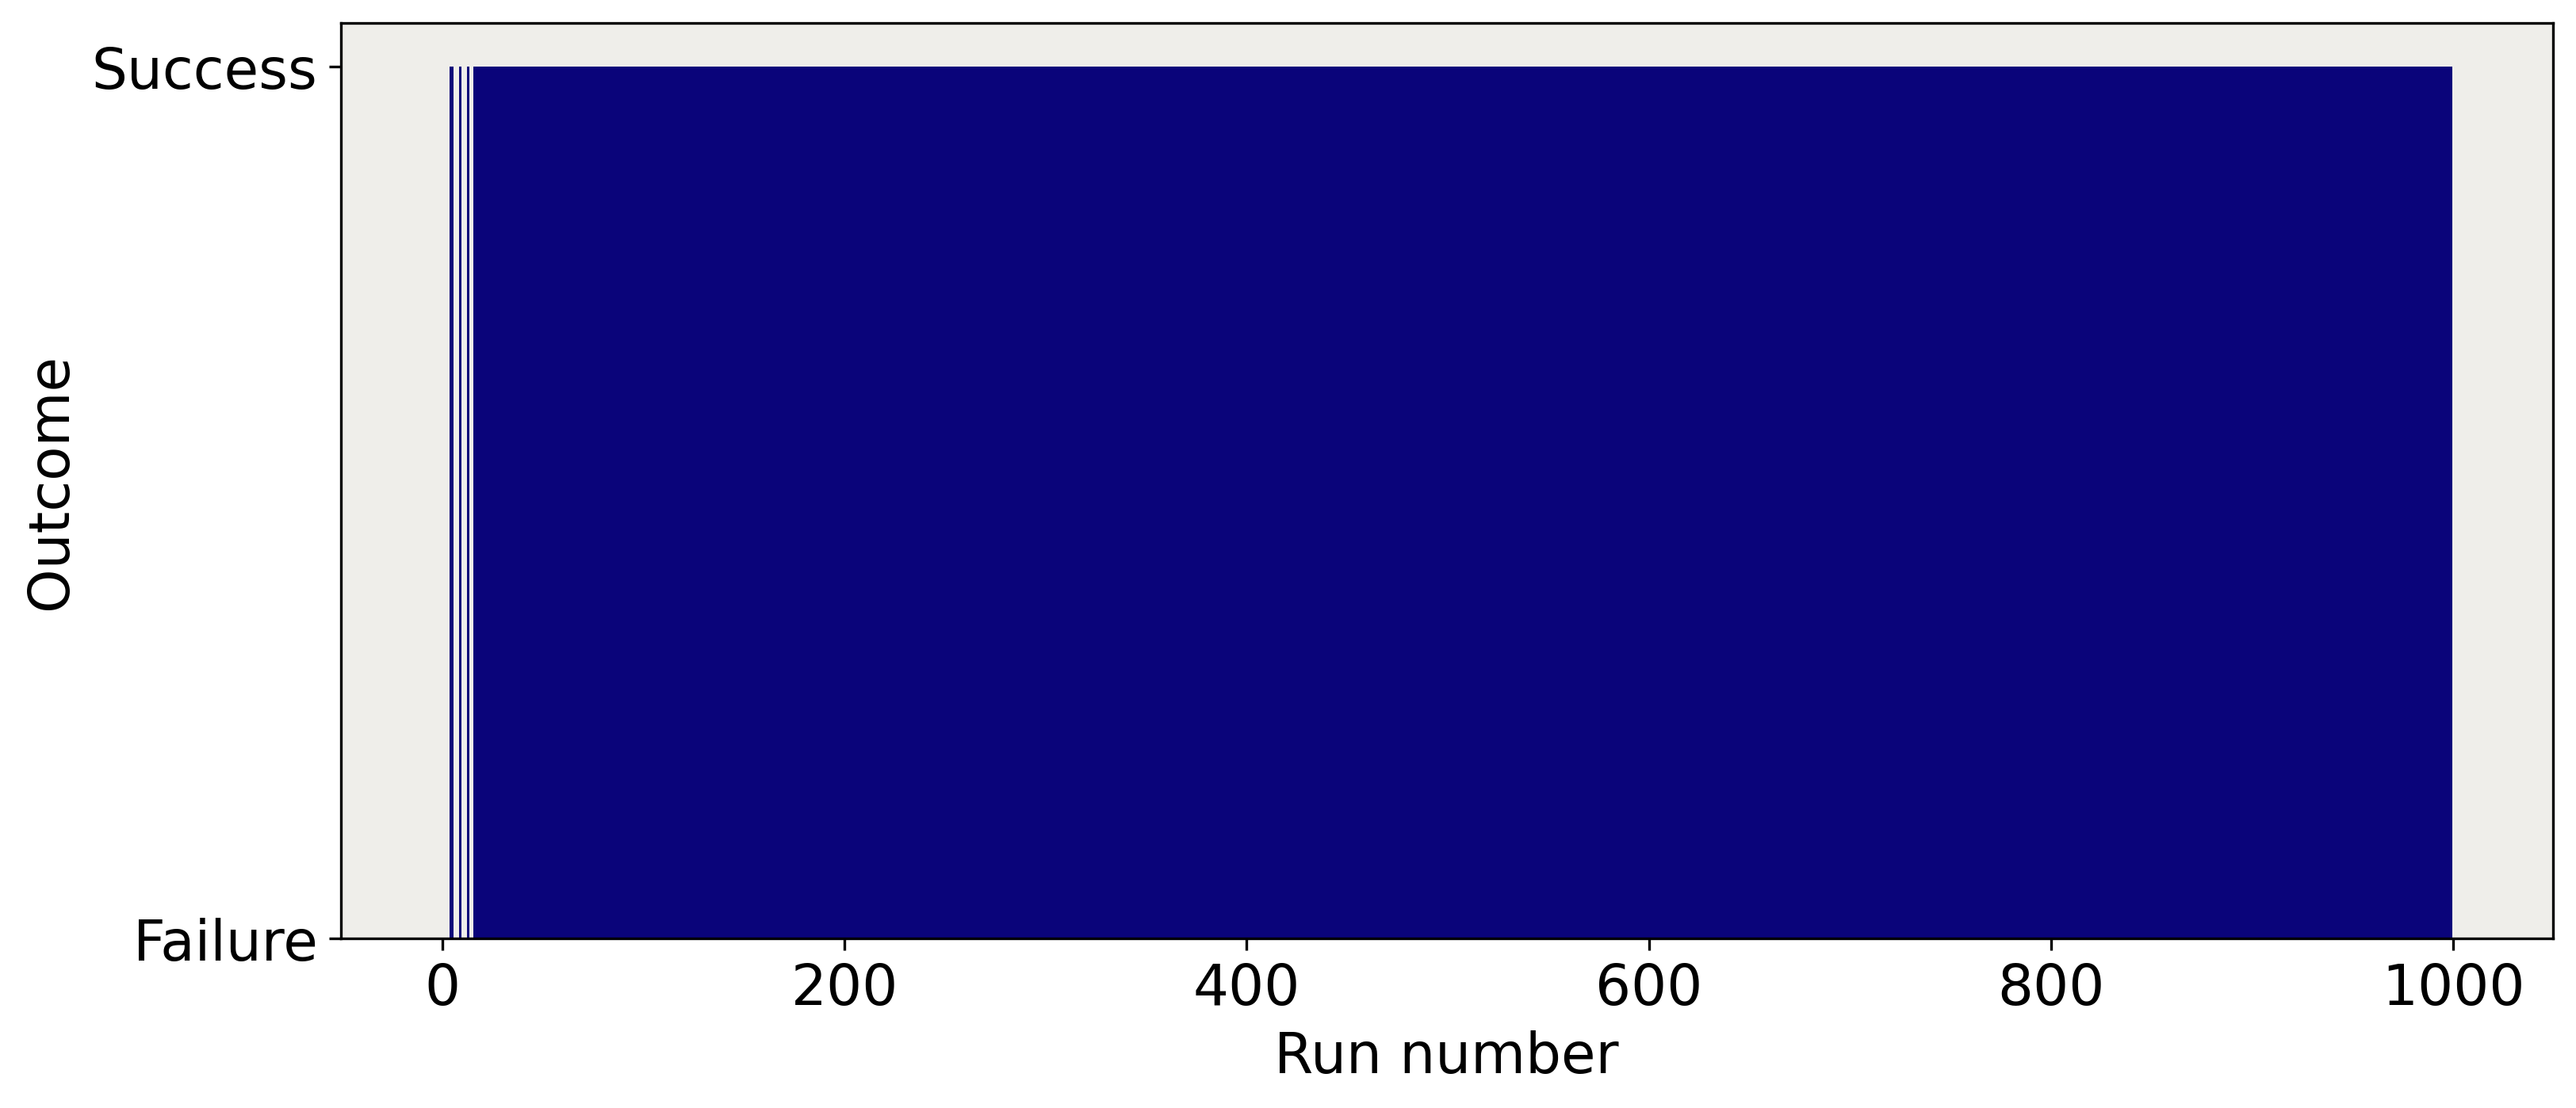

<Figure size 1920x1440 with 0 Axes>

In [6]:
#import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.size': 17})

# We re-initialize the Q-table
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hyperparameters
episodes = 1000        # Total number of episodes
alpha = 0.5            # Learning rate
gamma = 0.9            # Discount factor

# List of outcomes to plot
outcomes = []

print('Q-table before training:')
print(qtable)

# Training
for _ in range(episodes):
    state = environment.reset()[0]
    done = False

    # By default, we consider our outcome to be a failure
    outcomes.append("Failure")

    # Until the agent gets stuck in a hole or reaches the goal, keep training it
    while not done:
        # Choose the action with the highest value in the current state
        if np.max(qtable[state]) > 0:
          action = np.argmax(qtable[state])

        # If there's no best action (only zeros), take a random one
        else:
          action = environment.action_space.sample()
             
        # Implement this action and move the agent in the desired direction
        new_state, reward, done, info, _ = environment.step(action)

        # Update Q(s,a)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])
        
        # Update our current state
        state = new_state

        # If we have a reward, it means that our outcome is a success
        if reward:
          outcomes[-1] = "Success"

print()
print('===========================================')
print('Q-table after training:')
print(qtable)

# Plot outcomes
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color="#0A047A", width=1.0)
plt.show()
plt.savefig('noslippery.png')

In [7]:
episodes = 1000
nb_success = 0

# Evaluation
for _ in range(1000):
    state = environment.reset()[0]
    done = False
    
    # Until the agent gets stuck or reaches the goal, keep training it
    while not done:
        # Choose the action with the highest value in the current state
        if np.max(qtable[state]) > 0:
          action = np.argmax(qtable[state])

        # If there's no best action (only zeros), take a random one
        else:
          action = environment.action_space.sample()
             
        # Implement this action and move the agent in the desired direction
        new_state, reward, done, info, _ = environment.step(action)

        # Update our current state
        state = new_state

        # When we get a reward, it means we solved the game
        nb_success += reward

# Let's check our success rate!
print (f"Success rate = {nb_success/episodes*100}%")

Success rate = 100.0%


In [8]:
from IPython.display import clear_output
import time 

state = environment.reset()[0]
done = False
sequence = []

while not done:
    # Choose the action with the highest value in the current state
    if np.max(qtable[state]) > 0:
      action = np.argmax(qtable[state])

    # If there's no best action (only zeros), take a random one
    else:
      action = environment.action_space.sample()
    
    # Add the action to the sequence
    sequence.append(action)

    # Implement this action and move the agent in the desired direction
    new_state, reward, done, info, _ = environment.step(action)

    # Update our current state
    state = new_state

    # Update the render
    clear_output(wait=True)
    environment.render()
    time.sleep(1)

print(f"Sequence = {sequence}")

Sequence = [2, 1, 2, 2, 1, 1]


## This is Paul's best strategy to avoid the lake: East -> South -> East -> East -> South -> South and he will reach the end point.

Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-table after training:
[[0.531441 0.59049  0.59049  0.531441]
 [0.531441 0.6561   0.6561   0.59049 ]
 [0.59049  0.729    0.729    0.6561  ]
 [0.6561   0.81     0.729    0.729   ]
 [0.59049  0.6561   0.6561   0.531441]
 [0.59049  0.       0.729    0.59049 ]
 [0.6561   0.81     0.81     0.6561  ]
 [0.729    0.9      0.81     0.729   ]
 [0.6561   0.729    0.       0.59049 ]
 [0.       0.       0.       0.      ]
 [0.       0.9      0.9      0.729   ]
 [0.81     1.       0.9      0.81    ]
 [0.729    0.729    0.81     0.6561  ]
 [0.729    0.81     0.9      0.      ]
 [0.81     0.9      1.       0.81    ]
 [0.       0.       0.       0.      ]]


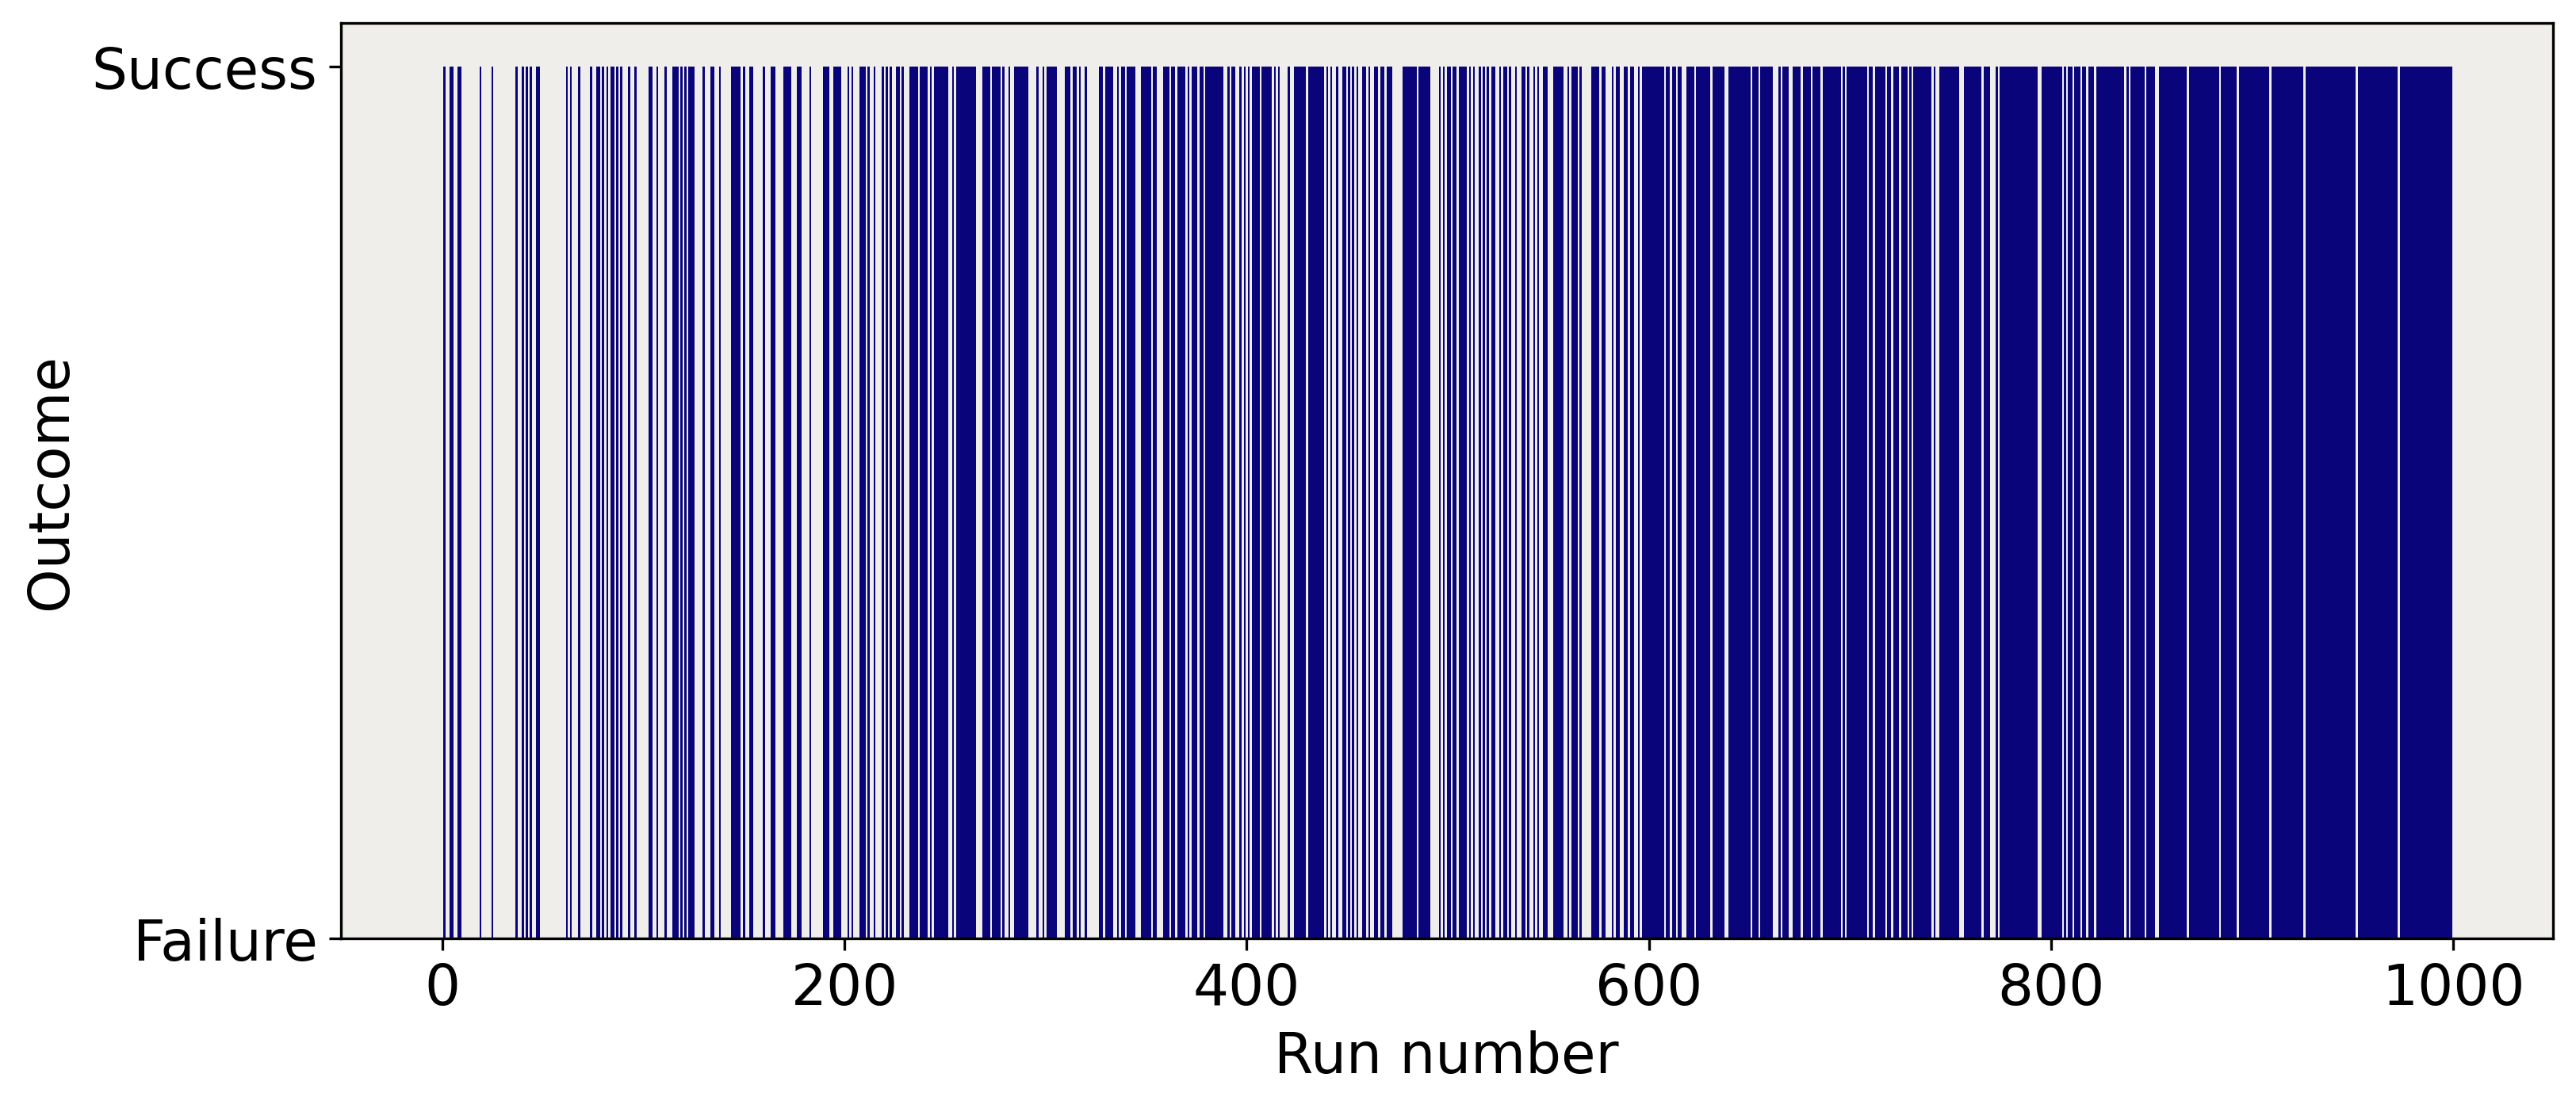

In [9]:
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hyperparameters
episodes = 1000        # Total number of episodes
alpha = 0.5            # Learning rate
gamma = 0.9            # Discount factor
epsilon = 1.0          # Amount of randomness in the action selection
epsilon_decay = 0.001  # Decrease randomness bit by bit

# For plotting purposes
outcomes = []

print('Q-table before training:')
print(qtable)

# Training
for _ in range(episodes):
    state = environment.reset()[0]
    done = False

    #Because we are at starting point and did not reach finish, first outcome is a failure
    outcomes.append("Failure")
    
    # Until the agent gets stuck in a hole or reaches the goal, keep training it
    while not done:
        # Generate a random number between 0 and 1
        rnd = np.random.random()

        # If random number < epsilon, take a random action
        if rnd < epsilon:
            action = environment.action_space.sample()
        # Else, take the action with the highest value in the current state
        else:
            action = np.argmax(qtable[state])
             
        new_state, reward, done, info, _ = environment.step(action)

        # Update the Q-table
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])
        
        # Next, update the state
        state = new_state

        # If we have a reward, it means agent was successful
        if reward:
          outcomes[-1] = "Success"

    # Update epsilon
    epsilon = max(epsilon - epsilon_decay, 0)

print()
print('===========================================')
print('Q-table after training:')
print(qtable)

# Plotting outcomes and such 
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color="#0A047A", width=1.0)
plt.show()

In [10]:
episodes = 1000
nb_success = 0

#Now actually testing the model
for _ in range(1000):
    state = environment.reset()[0]
    done = False
    
    # Until the agent gets stuck or reaches the goal, keep training it
    while not done:
        action = np.argmax(qtable[state])

        # taking that action with highest Q-table value and choosing it
        new_state, reward, done, info, _ = environment.step(action)

        # Update our current state
        state = new_state

        # When we get a reward, it means we solved the game
        nb_success += reward

# checking how well model was trained
print (f"Success rate = {nb_success/episodes*100}%")

Success rate = 100.0%


# With is_slippery activated to simulate Carol's ability to change Paul's directions. 

In [ ]:
environment = gym.make("FrozenLake-v1", desc=["SFFF", "FFFF", "FHFF", "FFFG"], is_slippery=True)
environment.reset()

# We re-initialize the Q-table
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hyperparameters
episodes = 1000        # Total number of episodes
alpha = 0.5            # Learning rate
gamma = 0.9            # Discount factor
epsilon = 1.0          # Amount of randomness in the action selection
epsilon_decay = 0.001  # Fixed amount to decrease

# List of outcomes to plot
outcomes = []

print('Q-table before training:')
print(qtable)

# Training
for _ in range(episodes):
    state = environment.reset()[0]
    done = False

    # By default, we consider our outcome to be a failure
    outcomes.append("Failure")
    
    # Until the agent gets stuck in a hole or reaches the goal, keep training it
    while not done:
        # Generate a random number between 0 and 1
        rnd = np.random.random()

        # If random number < epsilon, take a random action
        if rnd < epsilon:
            action = environment.action_space.sample()
        # Else, take the action with the highest value in the current state
        else:
            action = np.argmax(qtable[state])
             
        # Implement this action and move the agent in the desired direction
        new_state, reward, done, info, thing = environment.step(action)

        # Update Q(s,a)
        qtable[state, action] = (qtable[state, action]) + \
                                (alpha * (reward + gamma * (np.max(qtable[new_state])) - (qtable[state, action])))
        
        # Update our current state
        state = new_state

        # If we have a reward, it means that our outcome is a success
        if reward:
            outcomes[-1] = "Success"

    # Update epsilon
    epsilon = max(epsilon - epsilon_decay, 0)

print()
print('===========================================')
print('Q-table after training:')
print(qtable)

# Plot outcomes
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color="#0A047A", width=1.0)
plt.show()

episodes = 1000
nb_success = 0

In [ ]:
# Evaluation
for _ in range(1000):
    state = environment.reset()[0]
    done = False
    
    # Until the agent gets stuck or reaches the goal, keep training it
    while not done:
        # Choose the action with the highest value in the current state
        action = np.argmax(qtable[state])

        # Implement this action and move the agent in the desired direction
        new_state, reward, done, info, thing = environment.step(action)

        # Update our current state
        state = new_state

        # When we get a reward, it means we solved the game
        nb_success += reward

# Let's check our success rate!
print (f"Success rate = {nb_success/episodes*100}%")

## Appendix Code for is_slippery = True with different grid

In [ ]:
environment = gym.make("FrozenLake-v1", is_slippery=True)
environment.reset()

# Q-Table
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Parameters to work with
episodes = 1000       # Total number of episodes
alpha = 0.6    # Learning rate
gamma = 0.9    # Discount factor
epsilon = 1.0          # Amount of randomness in the action selection
epsilon_decay = 0.01  # Fixed amount to decrease

# List of outcomes to plot
outcomes = []

print('Q-table before training:')
print(qtable)

# Training
for _ in range(episodes):
    state = environment.reset()[0]
    done = False


    outcomes.append("Failure")
    
    # Agent will be running through grid until it fails: will record actions and such
    while not done:
        # Generate a random number between 0 and 1
        rnd = np.random.random()

        # How to code up randomness with Carol's changing his steps: using epsilon
        if rnd < epsilon:
            action = environment.action_space.sample()
        # Else, take the action with the highest value in the current state
        else:
            action = np.argmax(qtable[state])
             
        # Implement this action and move the agent in the desired direction
        new_state, reward, done, info, _ = environment.step(action)

        # Update Q(s,a)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])
                
        # Update our current state
        state = new_state

        # If we have a reward, it means that our outcome is a success
        if reward:
            outcomes[-1] = "Success"

    # Update epsilon
    epsilon = max(epsilon - epsilon_decay, 0)

print()
print('===========================================')
print('Q-table after training:')
print(qtable)

# Plot outcomes
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color="#0A047A", width=1.0)
plt.show()
plt.savefig('isslipperyQlearning.png')

In [ ]:
episodes = 1000
nb_success = 0

# Testing the model
for _ in range(1000):
    state = environment.reset()[0]
    done = False
    
    # Until the agent gets stuck or reaches the goal, keep training it
    while not done:
        # Choose the action with the highest value in the current state
        action = np.argmax(qtable[state])

        # Implement this action and move the agent in the desired direction
        new_state, reward, done, info, _ = environment.step(action)

        # Update our current state
                                 
        state = new_state

        # When we get a reward, it means we solved the game
        nb_success += reward

# Let's check our success rate!
print (f"Success rate = {nb_success/episodes*100}%")

In [ ]:
grid = ["SFFFFFF", "FFFFFFFF", "FFFFFFFF", "FFFFHFFF","FFFFFFFF", "FFFFFFFF", "FFFFFFFF", "FFFFFFFG"]
environment = gym.make("FrozenLake-v1", map_name = '8x8', is_slippery=False)
environment.reset()

# Q-Table
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Parameters to work with
episodes = 1000       # Total number of episodes
alpha = 0.5    # Learning rate
gamma = 0.9    # Discount factor
epsilon = 1.0          # Amount of randomness in the action selection
epsilon_decay = 0.01  # Fixed amount to decrease

# List of outcomes to plot
outcomes = []

print('Q-table before training:')
print(qtable)

# Training
for _ in range(episodes):
    state = environment.reset()[0]
    done = False


    outcomes.append("Failure")
    
    # Agent will be running through grid until it fails: will record actions and such
    while not done:
        # Generate a random number between 0 and 1
        rnd = np.random.random()

        # How to code up randomness with Carol's changing his steps: using epsilon
        if rnd < epsilon:
            action = environment.action_space.sample()
        # Else, take the action with the highest value in the current state
        else:
            action = np.argmax(qtable[state])
             
        # Implement this action and move the agent in the desired direction
        new_state, reward, done, info, _ = environment.step(action)

        # Update Q(s,a)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])
                
        # Update our current state
        state = new_state

        # If we have a reward, it means that our outcome is a success
        if reward:
            outcomes[-1] = "Success"

    # Update epsilon
    epsilon = max(epsilon - epsilon_decay, 0)

print()
print('===========================================')
print('Q-table after training:')
print(qtable)

# Plot outcomes
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color="#0A047A", width=1.0)
plt.show()